# V02 Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly.express as px
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.transformations.series.impute import Imputer
from sktime.forecasting.trend import PolynomialTrendForecaster
import warnings



os.chdir("/home/cernerrood246/University/DataMining")
pd.set_option("display.precision", 2)

## Study Meta Data

In [2]:
study_meta_data_df = pd.read_csv("original_dataset/Study_Information.csv")
study_meta_data_df

,Participant,Start_Sit,Start_Stand,Start_Cycle1,Start_Cycle2,Start_Run1,Start_Run2,Cycle_Speed1,Cycle_Speed2,Run_Speed1,Run_Speed2,Comments,MET_Sit,MET_Stand,MET_Cycle1,MET_Cycle2,MET_Run1,MET_Run2
0,P01,2021-12-03 16:58:50,2021-12-03 17:03:00,2021-12-03 17:08:00,2021-12-03 17:13:00,2021-12-03 17:18:00,2021-12-03 17:23:00,14,20,4.0,6.0,,1,1.2,10,16,4.5,10.0
1,P02,2021-11-25 17:17:00,2021-11-25 17:23:00,2021-11-25 17:36:10,2021-11-25 17:41:50,2021-11-25 17:46:50,2021-11-25 17:51:00,14,19,5.0,8.5,Muse headband data lost due to connectivity is...,1,1.2,10,12,8.0,14.0
2,P03,2021-11-26 16:20:20,2021-11-26 16:26:20,2021-11-26 16:53:06,2021-11-26 16:56:18,2021-11-26 17:00:13,2021-11-26 17:04:05,18,22,6.0,7.0,Second part V02 data got losT,1,1.2,12,16,10.0,11.5
3,P04,2021-11-26 18:15:48,2021-11-26 18:21:56,2021-11-26 18:27:00,2021-11-26 18:32:20,2021-11-26 18:37:10,2021-11-26 18:45:00,15,22,6.0,9.0,Interruption at 18:41,1,1.2,10,16,10.0,15.0
4,P05,2021-11-29 09:40:47,2021-11-29 09:45:40,2021-11-29 09:51:41,2021-11-29 09:56:41,2021-11-29 10:02:10,2021-11-29 10:06:40,15,22,5.0,7.0,,1,1.2,10,16,8.0,11.5
5,P06,2021-11-29 10:37:54,2021-11-29 10:43:00,2021-11-29 10:49:20,2021-11-29 10:54:35,2021-11-29 11:00:00,2021-11-29 11:06:00,14,20,5.0,7.0,VO2 data was lost (?),1,1.2,10,16,8.0,11.5
6,P07,2021-11-29 15:33:02,2021-11-29 15:38:15,2021-11-29 15:45:25,2021-11-29 15:50:00,2021-11-29 15:57:00,2021-11-29 16:02:00,16,23,5.5,8.0,Low quality HR during running,1,1.2,12,16,9.0,13.5
7,P08,2021-11-29 18:00:31,2021-11-29 18:05:30,2021-11-29 18:11:00,2021-11-29 18:16:00,2021-11-29 18:21:00,2021-11-29 18:26:00,9,18,5.0,9.0,,1,1.2,4,12,8.0,15.0
8,P09,2021-11-30 09:19:12,2021-11-30 09:24:20,2021-11-30 09:30:30,2021-11-30 09:36:00,2021-11-30 09:41:20,2021-11-30 09:46:20,14,30,6.4,9.0,,1,1.2,10,16,11.0,15.0
9,P10,2021-11-30 10:32:45,2021-11-30 10:37:40,2021-11-30 11:45:00,2021-11-30 11:50:20,2021-11-30 11:55:30,2021-11-30 12:01:00,20,24,5.0,6.5,Sleepiness level 2 if 4 is very sleepy,1,1.2,16,16,8.0,11.0


In [3]:
study_meta_data_df.select_dtypes(include=np.number).corr()


,Cycle_Speed1,Cycle_Speed2,Run_Speed1,Run_Speed2,MET_Sit,MET_Stand,MET_Cycle1,MET_Cycle2,MET_Run1,MET_Run2
Cycle_Speed1,1.00,0.71,0.62,0.44,NaN,NaN,0.98,0.47,0.60,0.40
Cycle_Speed2,0.71,1.00,0.84,0.77,NaN,NaN,0.71,0.43,0.83,0.76
Run_Speed1,0.62,0.84,1.00,0.87,NaN,NaN,0.58,0.24,0.99,0.87
Run_Speed2,0.44,0.77,0.87,1.00,NaN,NaN,0.46,-0.02,0.84,0.95
MET_Sit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MET_Stand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MET_Cycle1,0.98,0.71,0.58,0.46,NaN,NaN,1.00,0.44,0.56,0.41
MET_Cycle2,0.47,0.43,0.24,-0.02,NaN,NaN,0.44,1.00,0.22,-0.07
MET_Run1,0.60,0.83,0.99,0.84,NaN,NaN,0.56,0.22,1.00,0.86
MET_Run2,0.40,0.76,0.87,0.95,NaN,NaN,0.41,-0.07,0.86,1.00


-> Cycle 2 doesn't correlate with effort, in general estimations don't seem great and are in 5 minute intervals which makes them kinda unusable

In [4]:
demographics_df = pd.read_csv("original_dataset/Demographics.csv")
demographics_df

,Participant,BMI,Fat,Muscle,Water,Bone,Weight,Height,Gender,Age,Comments
0,P01,24.7,33,14,49,4,70.6,166,F,29,NaN
1,P02,25.7,20,15,54,4,77.0,173,M,26,NaN
2,P03,20.6,23,16,57,5,61.0,172,F,26,NaN
3,P04,26.6,17,15,53,4,81.5,175,M,27,NaN
4,P05,24.8,31,14,48,4,66.0,163,F,33,NaN
5,P06,30.8,32,14,50,4,99.7,180,M,40,NaN
6,P07,25.8,18,14,50,4,71.0,166,M,34,NaN
7,P08,26.4,22,14,48,4,85.6,180,M,33,NaN
8,P09,26.4,19,14,49,4,76.0,177,M,27,NaN
9,P10,27.8,24,14,51,4,87.0,177,M,41,NaN


In [5]:
participants_list = study_meta_data_df.Participant.values
VO2_all_list = [pd.read_csv(f"original_dataset/{participant}/VO2/DataAverage.csv") for participant in participants_list]

## Preprocess

In [6]:
for participant_df in VO2_all_list:
    print(participant_df.isnull().sum())

Time[s]           0
Time[hh:mm:ss]    0
VO2[mL/kg/min]    1
VO2[mL/min]       1
HR[bpm]           0
Rf[bpm]           1
Tv[L]             1
Ve[L/min]         1
Ve/VO2            1
FeO2[%]           1
Pressure[hPa]     1
Temp[C]           1
HUM[%RH]          1
RR[ms]            0
Time              0
dtype: int64
Time[s]           0
Time[hh:mm:ss]    0
VO2[mL/kg/min]    1
VO2[mL/min]       1
HR[bpm]           0
Rf[bpm]           1
Tv[L]             1
Ve[L/min]         1
Ve/VO2            1
FeO2[%]           1
Pressure[hPa]     1
Temp[C]           1
HUM[%RH]          1
RR[ms]            0
Time              0
dtype: int64
Time[s]           0
Time[hh:mm:ss]    0
VO2[mL/kg/min]    2
VO2[mL/min]       2
HR[bpm]           0
Rf[bpm]           2
Tv[L]             2
Ve[L/min]         2
Ve/VO2            2
FeO2[%]           2
Pressure[hPa]     2
Temp[C]           2
HUM[%RH]          2
RR[ms]            0
Time              0
dtype: int64
Time[s]           0
Time[hh:mm:ss]    0
VO2[mL/kg/min]    0
V

=> Very few null values, should be fine just to fill them and ignore

In [7]:
for participant_df in VO2_all_list:
    print((participant_df["Time[s]"].diff() <= -1)[1:].any())
    if (participant_df["Time[s]"].diff() <= -1)[1:].any():
        print(participant_df[(participant_df["Time[s]"].diff() <= -1)]) 

False
True
     Time[s] Time[hh:mm:ss]  VO2[mL/kg/min]  VO2[mL/min]  HR[bpm]  Rf[bpm]  \
604        1       00:00:01             0.0          0.0       56      0.0   

     Tv[L]  Ve[L/min]  Ve/VO2  FeO2[%]  Pressure[hPa]  Temp[C]  HUM[%RH]  \
604    0.0        0.0     0.0      0.0            0.0      0.0       0.0   

     RR[ms]                 Time  
604  1000.0  2021-11-25 17:30:50  
True
     Time[s] Time[hh:mm:ss]  VO2[mL/kg/min]  VO2[mL/min]  HR[bpm]  Rf[bpm]  \
626        1       00:00:01             0.0          0.0        0      0.0   

     Tv[L]  Ve[L/min]  Ve/VO2  FeO2[%]  Pressure[hPa]  Temp[C]  HUM[%RH]  \
626    0.0        0.0     0.0      0.0            0.0      0.0       0.0   

     RR[ms]                 Time  
626     0.0  2021-11-26 16:43:12  
False
False
False
False
False
False
False
False
True
      Time[s] Time[hh:mm:ss]  VO2[mL/kg/min]  VO2[mL/min]  HR[bpm]  Rf[bpm]  \
1056        1       00:00:01             0.0          0.0     60.0      0.0   

      Tv[L] 

=> Some seconds are duplicated / some are missing

Participant 1
    number of zeros: 3
    number of identified outliers:210
Participant 2
    number of zeros: 445
    number of identified outliers:325
Participant 3
    number of zeros: 521
    number of identified outliers:184
Participant 4
    number of zeros: 3
    number of identified outliers:167
Participant 5
    number of zeros: 2
    number of identified outliers:195
Participant 6
    number of zeros: 69
    number of identified outliers:237
Participant 7
    number of zeros: 2
    number of identified outliers:268
Participant 8
    number of zeros: 6
    number of identified outliers:189
Participant 9
    number of zeros: 279
    number of identified outliers:274
Participant 10
    number of zeros: 19
    number of identified outliers:206
Participant 11
    number of zeros: 2
    number of identified outliers:187
Participant 12
    number of zeros: 107
    number of identified outliers:234
Participant 13
    number of zeros: 0
    number of identified outliers:234
Participant

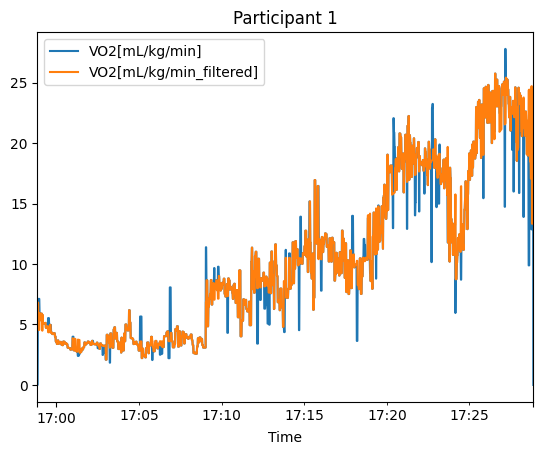

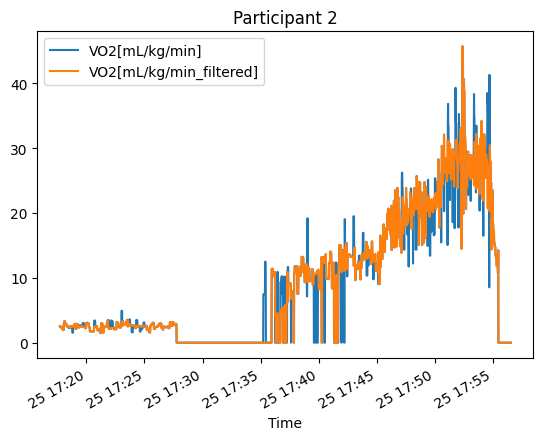

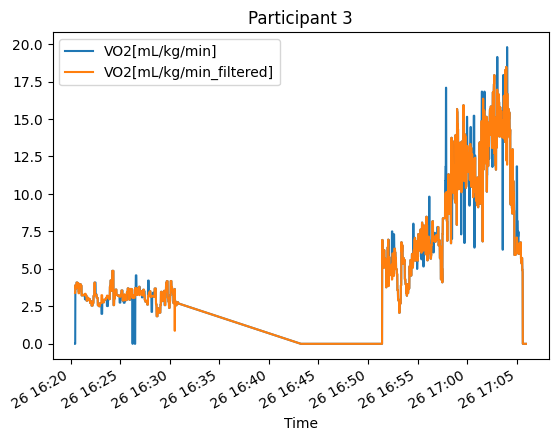

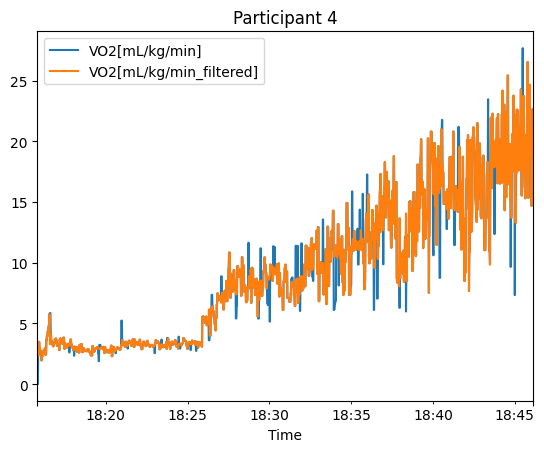

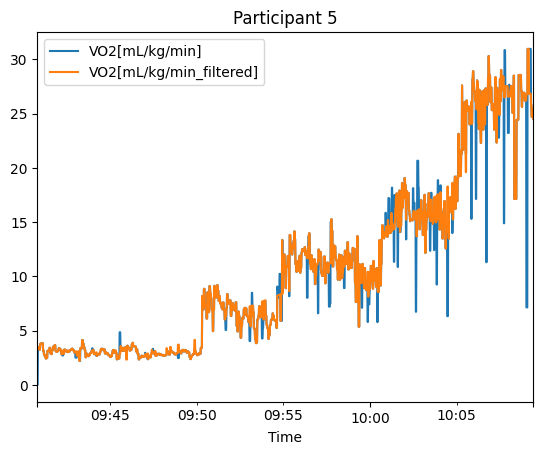

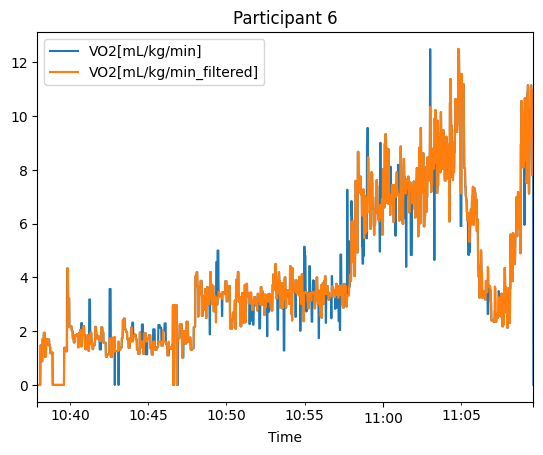

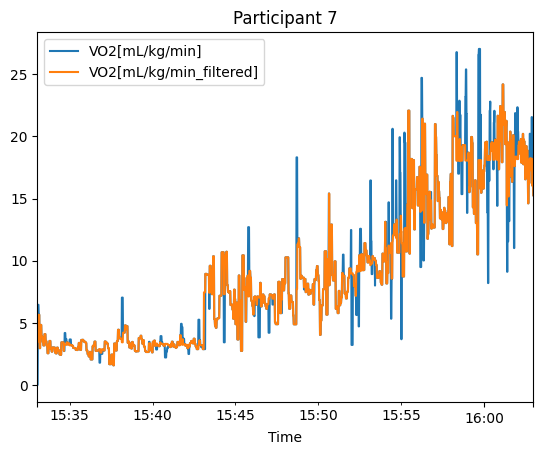

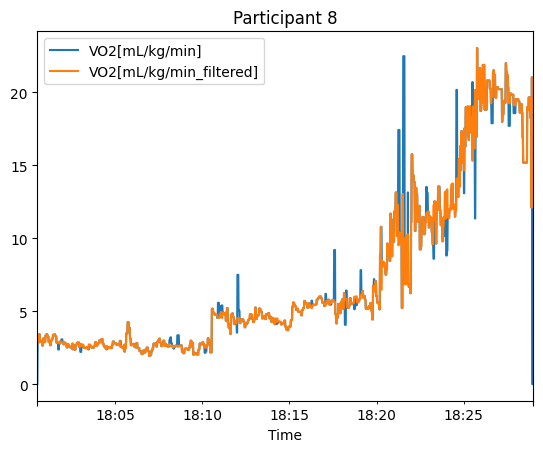

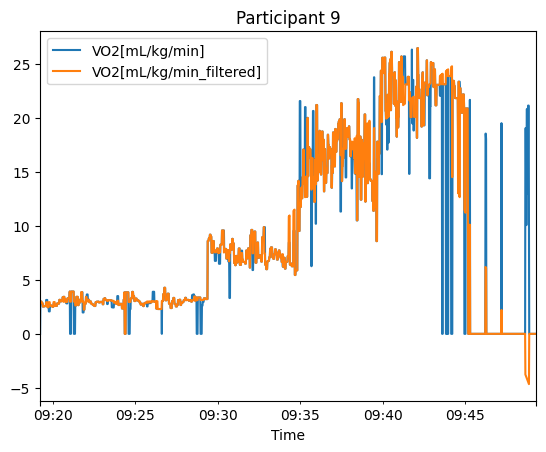

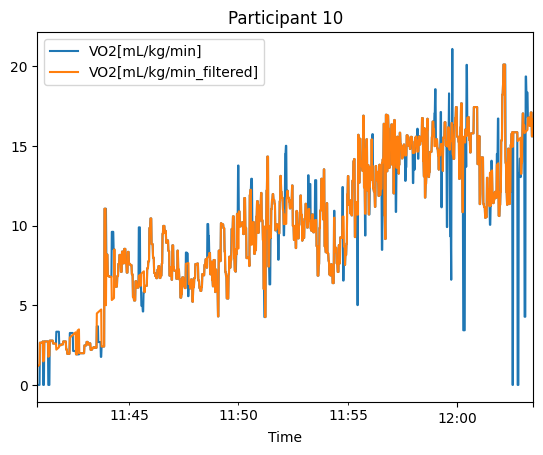

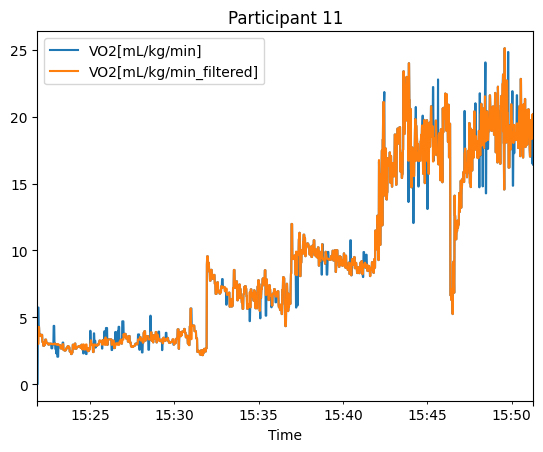

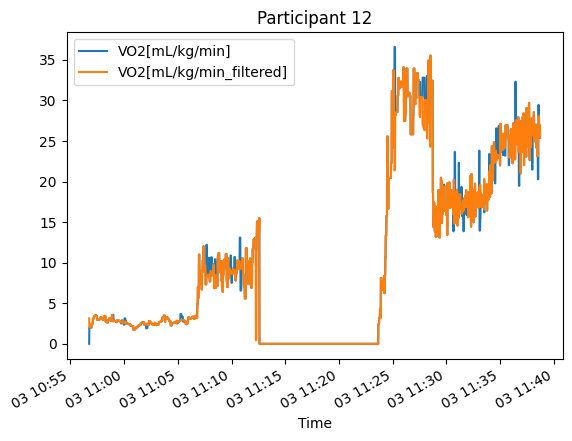

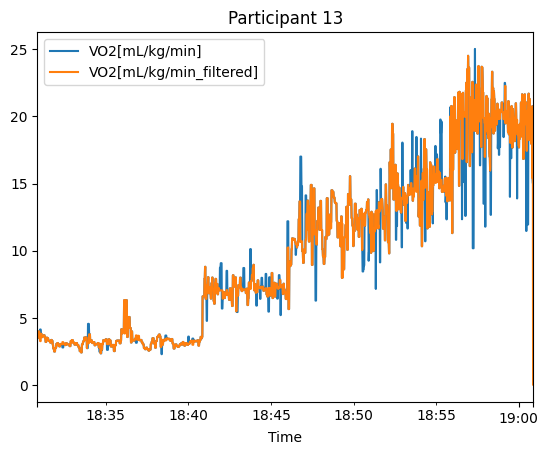

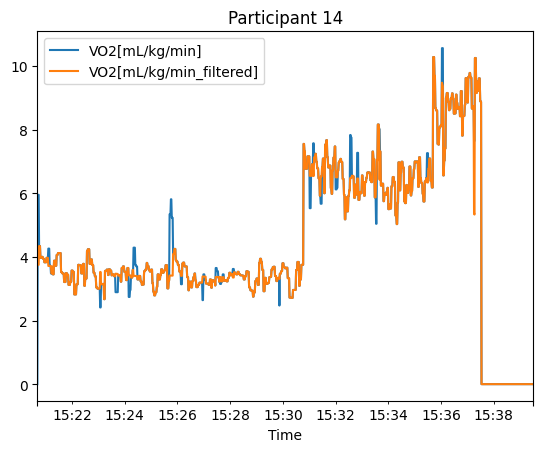

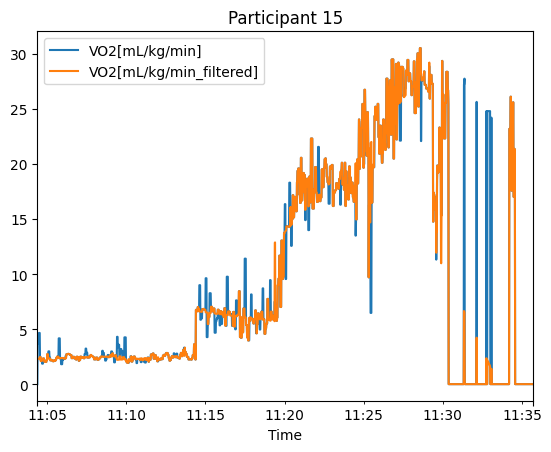

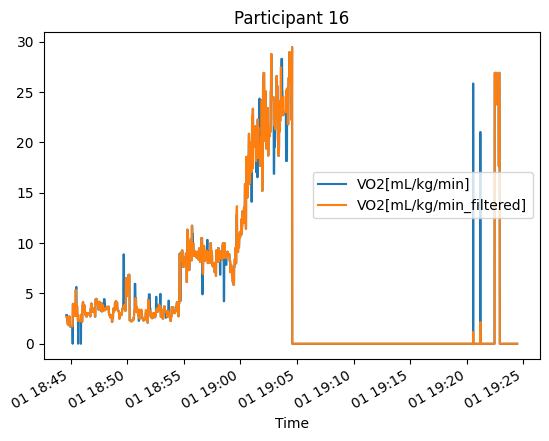

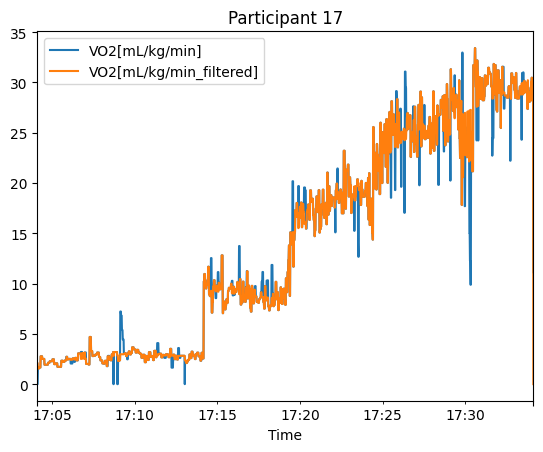

In [8]:
participants_list = study_meta_data_df.Participant.values
VO2_all_list = [pd.read_csv(f"original_dataset/{participant}/VO2/DataAverage.csv") for participant in participants_list]

V02_all_preprocessed_list = []

for p_number ,participant_df in enumerate(VO2_all_list):
    print(f"Participant {p_number+1}")
    temp_participant_df = participant_df.copy()


    temp_participant_df = temp_participant_df.drop(columns=["Time[hh:mm:ss]"])

    
    start_timestamp = pd.to_datetime(temp_participant_df["Time"].loc[0],format='%Y-%m-%d %H:%M:%S')
    temp_participant_df["Delta_Time"] = pd.to_datetime(temp_participant_df["Time"], format='%Y-%m-%d %H:%M:%S') - start_timestamp
    temp_participant_df["Time"] = pd.to_datetime(temp_participant_df["Time"], format='%Y-%m-%d %H:%M:%S')
    
    temp_participant_df = temp_participant_df.groupby("Time").mean()
    temp_participant_df = temp_participant_df.asfreq("s")
    temp_participant_df["Time[s]"] = np.arange(1, len(temp_participant_df) + 1)
    temp_participant_df = temp_participant_df.dropna(thresh = 6)
    
    #temp_participant_df = temp_participant_df[temp_participant_df["Time[s]"] <= 1800]

    #print(participant_df["Time[s]"].max())
    print(f"    number of zeros: {(temp_participant_df['VO2[mL/kg/min]'] == 0).sum()}")
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message="Series contains nan values")
        transformer = HampelFilter(window_length=30, n_sigma=2, return_bool = False)
        y_hat = transformer.fit_transform(temp_participant_df["VO2[mL/kg/min]"].values)
    #calculat number of nans in y_hat
    print(f"    number of identified outliers:{np.isnan(y_hat).sum()}")
    forecaster = PolynomialTrendForecaster(degree=2)
    transformer = Imputer(forecaster=forecaster)
    for i in range(int(np.ceil(y_hat.shape[0] / 300))):
        if (i+1)*300 > y_hat.shape[0]:
            try: 
                y_hat[i*300:] = transformer.fit_transform(y_hat[i*300:])
            except:
                y_hat[i*300:] = np.zeros(shape = y_hat[i*300:].shape)
        else: 
            y_hat[i*300:(i+1)*300] = transformer.fit_transform(y_hat[i*300:(i+1)*300])
    temp_participant_df["VO2[mL/kg/min_filtered]"] = y_hat
    
    temp_participant_df[["VO2[mL/kg/min]", "VO2[mL/kg/min_filtered]"]].plot(title=f"Participant {p_number+1}")

    V02_all_preprocessed_list.append(temp_participant_df)
    

    

In [21]:
test = V02_all_preprocessed_list[0].copy()
test.head()


,Time[s],VO2[mL/kg/min],VO2[mL/min],HR[bpm],Rf[bpm],Tv[L],Ve[L/min],Ve/VO2,FeO2[%],Pressure[hPa],Temp[C],HUM[%RH],RR[ms],Delta_Time,VO2[mL/kg/min_filtered]
Time,,,,,,,,,,,,,,,
2021-12-03 16:58:51,1,0.00,0.00,101.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,597.66,0 days 00:00:00,4.59
2021-12-03 16:58:52,2,0.00,0.00,101.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,610.84,0 days 00:00:01,4.58
2021-12-03 16:58:53,3,6.81,470.17,101.0,20.75,0.68,14.21,30.22,16.14,1000.1,22.97,39.78,644.53,0 days 00:00:02,6.81
2021-12-03 16:58:54,4,6.81,470.17,100.0,20.75,0.68,14.21,30.22,16.14,1000.1,22.97,39.78,613.28,0 days 00:00:03,6.81
2021-12-03 16:58:55,5,7.12,491.33,100.0,18.55,0.81,15.09,30.71,16.35,1000.3,22.98,39.79,605.47,0 days 00:00:04,4.57


In [18]:
test.columns

Index(['Time[s]', 'VO2[mL/kg/min]', 'VO2[mL/min]', 'HR[bpm]', 'Rf[bpm]',
       'Tv[L]', 'Ve[L/min]', 'Ve/VO2', 'FeO2[%]', 'Pressure[hPa]', 'Temp[C]',
       'HUM[%RH]', 'RR[ms]', 'Delta_Time', 'VO2[mL/kg/min_filtered]'],
      dtype='object')

In [19]:
test.dtypes

Time[s]                              int64
VO2[mL/kg/min]                     float64
VO2[mL/min]                        float64
HR[bpm]                            float64
Rf[bpm]                            float64
Tv[L]                              float64
Ve[L/min]                          float64
Ve/VO2                             float64
FeO2[%]                            float64
Pressure[hPa]                      float64
Temp[C]                            float64
HUM[%RH]                           float64
RR[ms]                             float64
Delta_Time                 timedelta64[ns]
VO2[mL/kg/min_filtered]            float64
dtype: object

In [22]:
temp_timedelta = test["Delta_Time"]
test = test.drop(columns=["Delta_Time"])
last = lambda x: x.iloc[-1]
test = test.select_dtypes(include=np.number).rolling(5, min_periods = 1).agg({'Time[s]':last,
                                                              'VO2[mL/kg/min]':"mean", 
                                                              'VO2[mL/min]':"mean", 
                                                              'HR[bpm]':"mean", 
                                                              'Rf[bpm]':"mean",
                                                              'Tv[L]':"mean", 
                                                              'Ve[L/min]':"mean", 
                                                              'Ve/VO2':"mean", 
                                                              'FeO2[%]':"mean", 
                                                              'Pressure[hPa]':"mean", 
                                                              'Temp[C]':"mean",
                                                              'HUM[%RH]':"mean", 
                                                              'RR[ms]':"mean", 
                                                              #'Delta_Time':first, 
                                                              'VO2[mL/kg/min_filtered]':"mean",
                                                             })
test["Delta_Time"] = temp_timedelta
test.head(10)

,Time[s],VO2[mL/kg/min],VO2[mL/min],HR[bpm],Rf[bpm],Tv[L],Ve[L/min],Ve/VO2,FeO2[%],Pressure[hPa],Temp[C],HUM[%RH],RR[ms],VO2[mL/kg/min_filtered],Delta_Time
Time,,,,,,,,,,,,,,,
2021-12-03 16:58:51,1.0,0.00,0.00,101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,597.66,4.59,0 days 00:00:00
2021-12-03 16:58:52,2.0,0.00,0.00,101.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,604.25,4.59,0 days 00:00:01
2021-12-03 16:58:53,3.0,2.27,156.72,101.00,6.92,0.23,4.74,10.07,5.38,333.37,7.66,13.26,617.68,5.33,0 days 00:00:02
2021-12-03 16:58:54,4.0,3.40,235.09,100.75,10.38,0.34,7.11,15.11,8.07,500.05,11.48,19.89,616.58,5.70,0 days 00:00:03
2021-12-03 16:58:55,5.0,4.15,286.33,100.60,12.01,0.43,8.70,18.23,9.73,600.10,13.78,23.87,614.36,5.47,0 days 00:00:04
2021-12-03 16:58:56,6.0,5.57,384.60,100.40,15.72,0.60,11.72,24.37,13.00,800.16,18.38,31.83,619.04,5.47,0 days 00:00:05
2021-12-03 16:58:57,7.0,7.00,482.87,99.80,19.43,0.76,14.74,30.51,16.27,1000.22,22.98,39.79,627.34,5.46,0 days 00:00:06
2021-12-03 16:58:58,8.0,7.06,487.10,99.00,18.99,0.78,14.91,30.61,16.31,1000.26,22.98,39.79,623.83,5.01,0 days 00:00:07
2021-12-03 16:58:59,9.0,6.88,474.90,98.20,18.38,0.80,14.79,31.21,16.41,1000.26,22.98,39.79,628.90,4.83,0 days 00:00:08


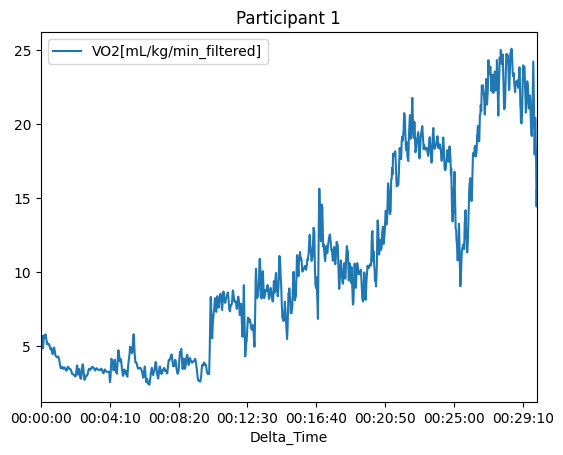

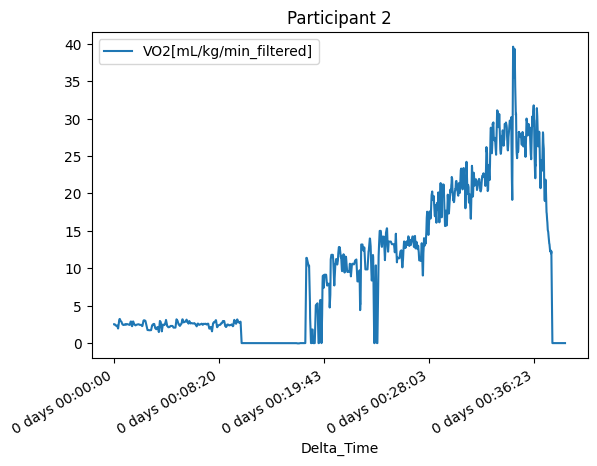

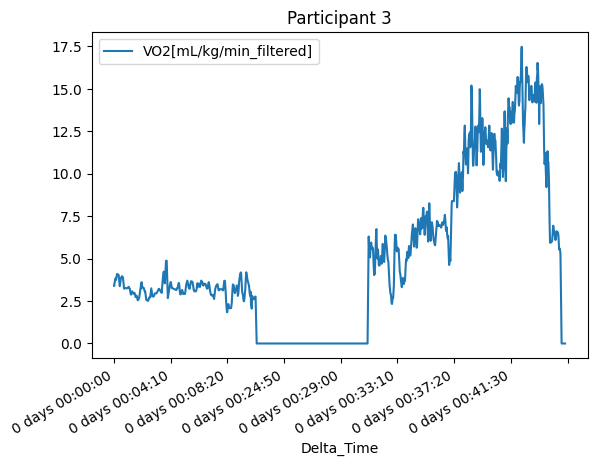

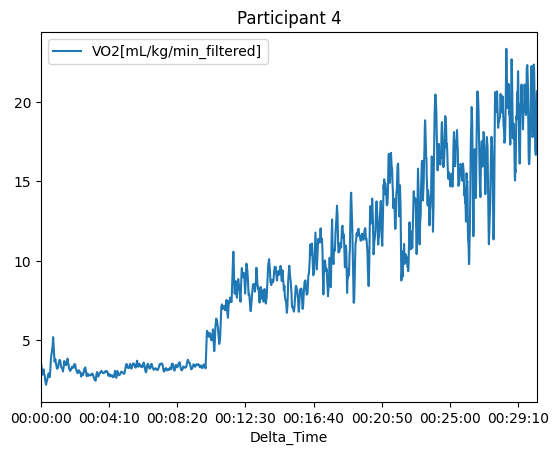

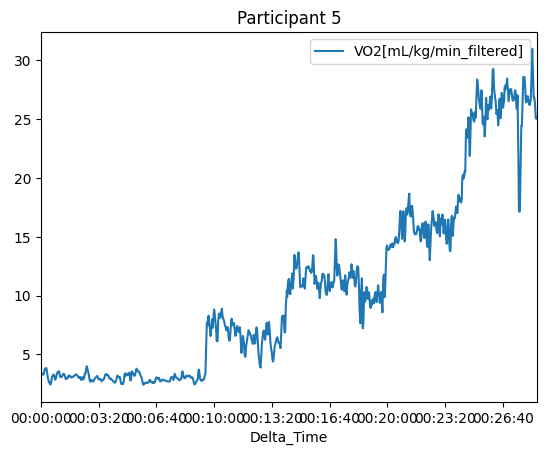

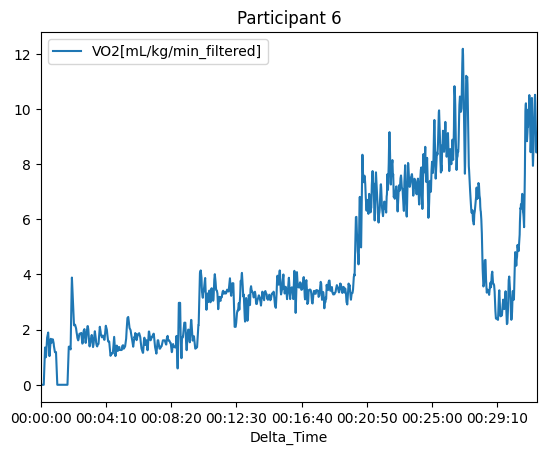

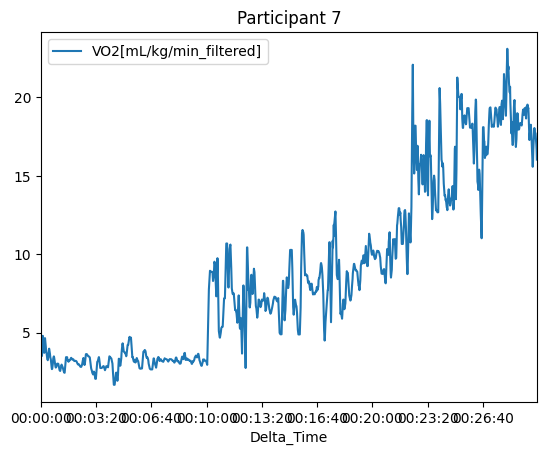

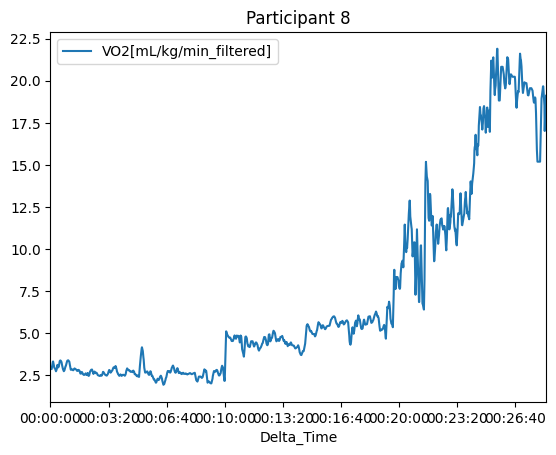

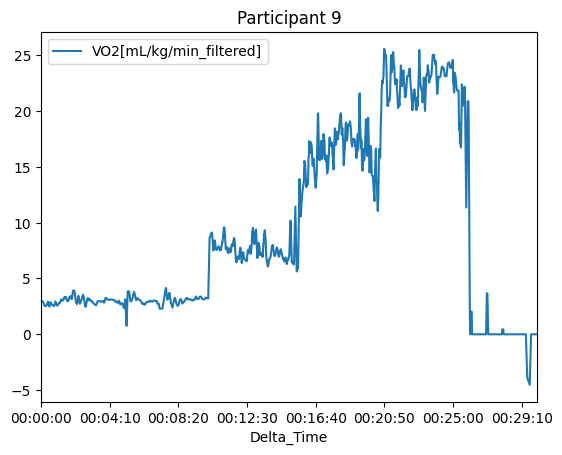

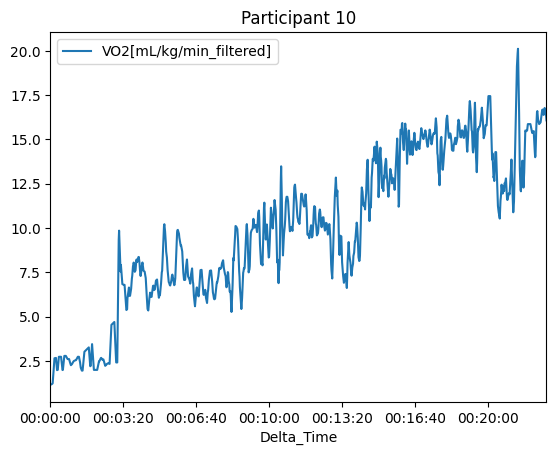

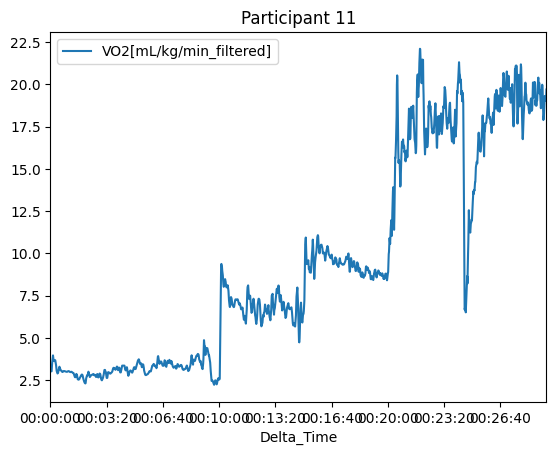

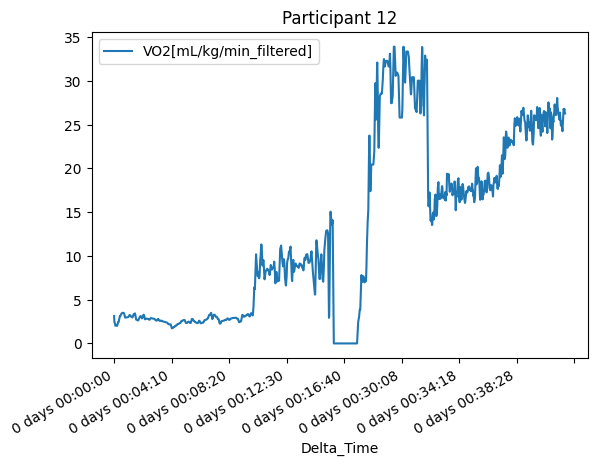

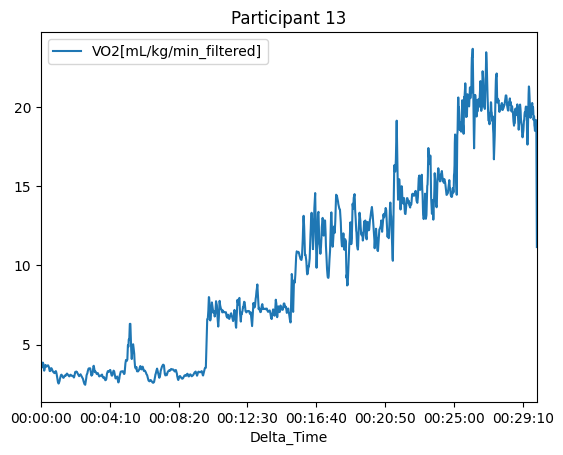

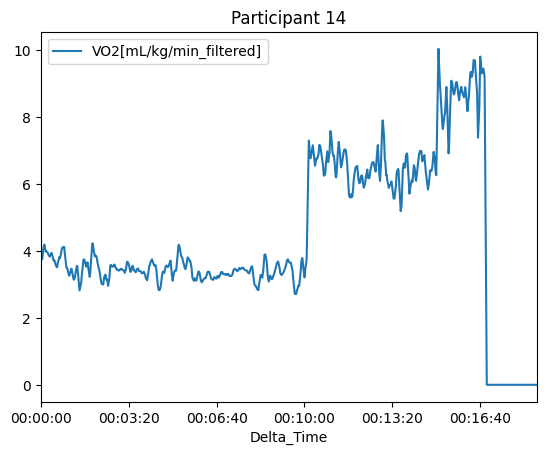

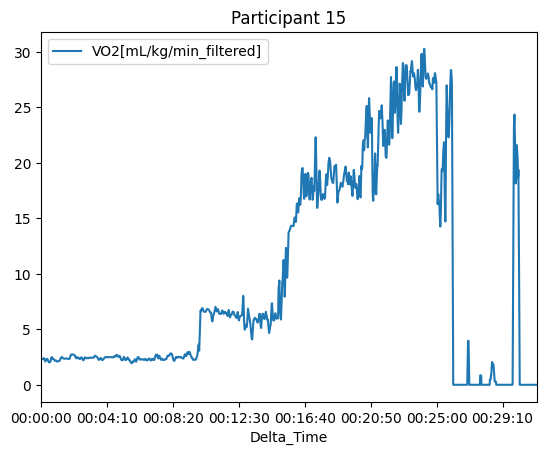

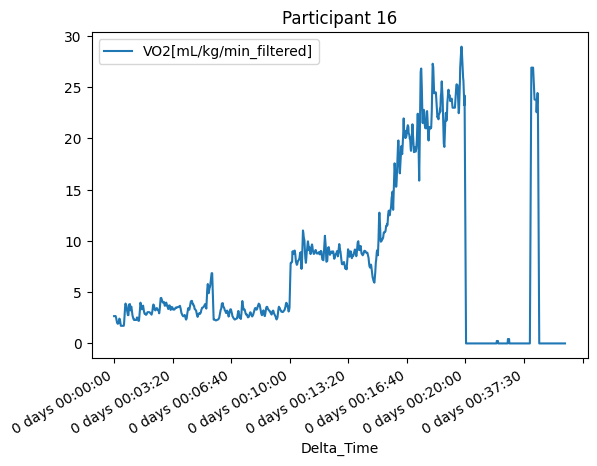

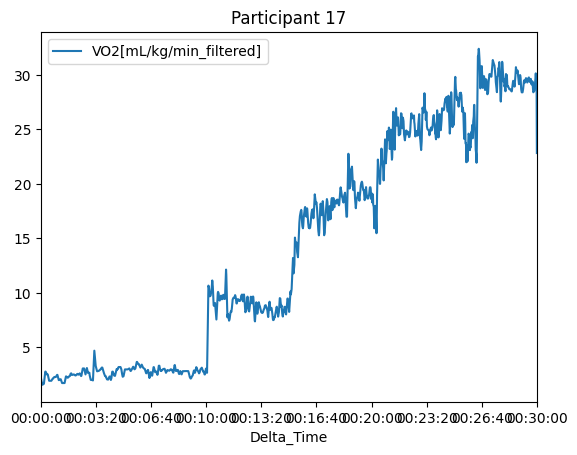

In [23]:
V02_all_converted_list = []
for i, participant_df in enumerate(V02_all_preprocessed_list):
    temp_participant_df = participant_df.copy()
    temp_timedelta = temp_participant_df["Delta_Time"]
    temp_participant_df = temp_participant_df.drop(columns=["Delta_Time"])
    last = lambda x: x.iloc[-1]
    temp_participant_df = temp_participant_df.rolling(5, min_periods = 1).agg({'Time[s]':last,
                                                                'VO2[mL/kg/min]':"mean", 
                                                                'VO2[mL/min]':"mean", 
                                                                'HR[bpm]':"mean", 
                                                                'Rf[bpm]':"mean",
                                                                'Tv[L]':"mean", 
                                                                'Ve[L/min]':"mean", 
                                                                'Ve/VO2':"mean", 
                                                                'FeO2[%]':"mean", 
                                                                'Pressure[hPa]':"mean", 
                                                                'Temp[C]':"mean",
                                                                'HUM[%RH]':"mean", 
                                                                'RR[ms]':"mean", 
                                                                #'Delta_Time':first, 
                                                                'VO2[mL/kg/min_filtered]':"mean",
                                                                })
    temp_participant_df["Delta_Time"] = temp_timedelta
    temp_participant_df.plot(x="Delta_Time", y="VO2[mL/kg/min_filtered]", title=f"Participant {i+1}")
    V02_all_converted_list.append(temp_participant_df)


In [26]:
#plot V02 before and after converting

for i, dfs in enumerate(zip(V02_all_preprocessed_list, V02_all_converted_list)):
    
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    dfs[0].plot(x="Delta_Time", y="VO2[mL/kg/min]", title=f"Participant {i+1} before")
    dfs[1].plot(x="Delta_Time", y="VO2[mL/kg/min_filtered]", title=f"Participant {i+1} after")
    fig.show()